In [1]:
import pandas as pd
import numpy as np

# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [2]:
transactions = pd.read_csv("/content/project_transactions.csv",
                          dtype={"DAY": "Int16",
                                 "QUANTITY": "Int32",
                                 "STORE_ID": "Int32",
                                 "WEEK_NO": "Int8",}
                          )

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
# Reduced memory usage by ~35MB after converting to correct dtypes

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [5]:
# Use to identify which values can be downcast

transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [6]:
# Check missing value counts

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [7]:
# Calculate unique households in dataset with nunique (describe could also be used)

transactions["household_key"].nunique()

2099

In [8]:
# Calculate unique product_ids in dataset with nunique

transactions["PRODUCT_ID"].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than one, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [9]:
# create a discount sum column and a percentage discount column
transactions = (
    transactions
    .assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
            percentage_discount = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs()))
    .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1))

In [10]:
# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 
* What was the highest quantiy sold for a single item in a single row?

In [11]:
# Total Sales Value

transactions['SALES_VALUE'].sum()

6666243.499999999

In [12]:
# Total Discount

transactions['total_discount'].sum()

-1178658.0799999998

In [13]:
# Overall Percent Discount

transactions['total_discount'].sum() / transactions['SALES_VALUE'].sum()

-0.1768099350106248

In [14]:
# Average of pct_discount column

transactions["percentage_discount"].mean()

0.2073244407398103

In [15]:
# Total Quantity Sold

transactions['QUANTITY'].sum()

216713611

In [16]:
# Max quantity in single row

transactions["QUANTITY"].max()

89638

In [17]:
# Use to grab row with max value - discount rate is lower than average

transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount           0.0538
Name: 1442095, dtype: Float64

In [18]:
# Sales value per transaction/basket

transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

28.61797938516092

In [19]:
# Sales value per household

transactions['SALES_VALUE'].sum() / transactions['household_key'].nunique()

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


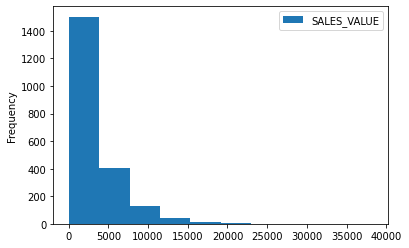

In [26]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogram

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .plot.hist())

In [29]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows

top10_value = (transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .iloc[:10])

top10_quant = (transactions
 .groupby("household_key")
 .agg({"QUANTITY": "sum"})
 .sort_values("QUANTITY", ascending=False)
 .iloc[:10])

In [22]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [23]:
top10_quant

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [30]:
# Use multiple aggregation to create both in a single table an option
# this here is just to use to compare to chart

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum','QUANTITY': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .loc[:, "SALES_VALUE"]
 .describe()
)

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

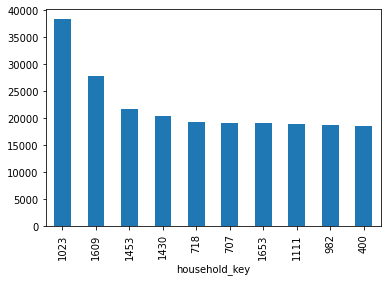

In [25]:
# top 10 households by sales value plotted with a bar plot

top10_value["SALES_VALUE"].plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top selling items have a higher than average discount rate?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* What was the name most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the product name of the item that had the highest quantity sold in a single row.

In [31]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows

top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)

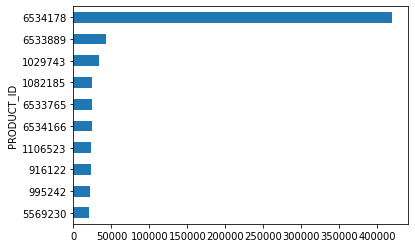

In [32]:
# plot top 10 products by sale value

top10_products["SALES_VALUE"].sort_values().plot.barh()

In [33]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum()) 
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

-0.10331267387397927

In [35]:
# read in products data

products = pd.read_csv("/content/project_transactions.csv")

products.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [36]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index
                  )

top_hh_products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [37]:
# Filter product table to products from prior cell
products.query("PRODUCT_ID in @top_hh_products")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
16,98,26984951769,1,1082185,1,0.39,337,0.00,1,0.0,0.0
22,1172,26985025264,1,981760,1,0.79,396,-0.60,1,0.0,0.0
29,1172,26985025264,1,1106523,1,1.50,396,0.00,1,0.0,0.0
56,1060,26985040735,1,951590,2,3.00,315,-0.98,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146231,1098,42289918722,711,1082185,1,0.51,343,0.00,102,0.0,0.0
2146246,303,42289918892,711,951590,2,4.18,343,0.00,102,0.0,0.0
2146255,303,42289918892,711,1082185,1,1.10,343,0.00,102,0.0,0.0
2146278,761,42289921056,711,1029743,1,2.89,343,0.00,102,0.0,0.0


In [38]:
# Product with highest quantity in a single row

products.query("PRODUCT_ID == 6534178")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
3958,932,27115512637,12,6534178,995,2.18,422,-0.01,2,0.0,0.0
3960,932,27115512702,12,6534178,1461,3.20,422,-0.01,2,0.0,0.0
4613,778,27130432788,13,6534178,2416,5.00,310,-0.24,3,0.0,0.0
4894,778,27130955980,14,6534178,2728,6.00,422,-0.27,3,0.0,0.0
5324,778,27153895714,15,6534178,8737,20.00,310,-0.01,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2144444,1190,42289677579,711,6534178,4237,10.00,31582,-0.42,102,0.0,0.0
2145347,867,42289810367,711,6534178,10515,25.02,369,-1.05,102,0.0,0.0
2145348,898,42289812766,711,6534178,10731,26.60,369,-0.01,102,0.0,0.0
2145562,1299,42289847420,711,6534178,11360,27.03,345,-1.13,102,0.0,0.0


In [39]:
# Look up 10 product names for all customers (from first cell)

products.query("PRODUCT_ID in @top10_products.index")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
16,98,26984951769,1,1082185,1,0.39,337,0.00,1,0.0,0.0
29,1172,26985025264,1,1106523,1,1.50,396,0.00,1,0.0,0.0
31,1172,26985025264,1,5569230,1,2.33,396,-2.26,1,0.0,0.0
69,1060,26985040735,1,1082185,1,0.84,315,0.00,1,0.0,0.0
80,1060,26985040735,1,5569230,1,2.33,315,-2.26,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146231,1098,42289918722,711,1082185,1,0.51,343,0.00,102,0.0,0.0
2146248,303,42289918892,711,995242,1,1.94,343,0.00,102,0.0,0.0
2146255,303,42289918892,711,1082185,1,1.10,343,0.00,102,0.0,0.0
2146278,761,42289921056,711,1029743,1,2.89,343,0.00,102,0.0,0.0
